# imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
%run ../function_proposed_gcn.py

In [3]:
with open('../fraudTrain.pkl', 'rb') as file:
    fraudTrain = pickle.load(file)    

In [12]:
df50 = throw(fraudTrain,0.5)

In [23]:
df_tr. df_tst = sklearn.model_selection.train_test_split(df50)

In [24]:
df2, mask = concat(df_tr, df_tst)
df2['index'] = df2.index
df3 = df2.reset_index()

In [52]:
df3.shape, df_tr.shape, df_tst.shape

((12012, 24), (9009, 22), (3003, 22))

In [46]:
groups = df.groupby('cc_num')
edge_index = np.array([item for sublist in (compute_time_difference(group) for _, group in groups) for item in sublist])
edge_index = edge_index.astype(np.float64)

In [27]:
theta=edge_index[:,2].mean()

In [54]:
theta

7902291.9480857365

(array([95626., 22640., 19560., 16682., 14894., 11466.,  8934.,  6164.,
         2956.,   946.]),
 array([       0.,  3750444.,  7500888., 11251332., 15001776., 18752220.,
        22502664., 26253108., 30003552., 33753996., 37504440.]),
 <BarContainer object of 10 artists>)

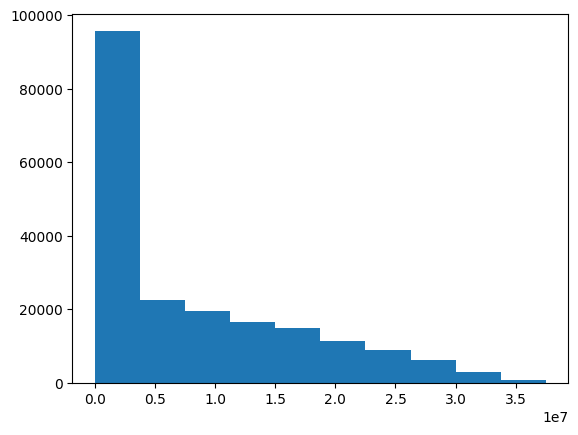

In [28]:
plt.hist(edge_index[:,2])

In [29]:
edge_index[:,2] = (np.exp(-edge_index[:,2]/(theta)) != 1)*(np.exp(-edge_index[:,2]/(theta))).tolist()

In [32]:
gamma = (edge_index[:,2]).mean()

In [35]:
gamma

0.5099377442499056

(array([44802., 22396., 15624., 12386., 10058.,  9374.,  7900.,  6672.,
         6418., 64238.]),
 array([0.        , 0.09999924, 0.19999848, 0.29999772, 0.39999696,
        0.4999962 , 0.59999544, 0.69999469, 0.79999393, 0.89999317,
        0.99999241]),
 <BarContainer object of 10 artists>)

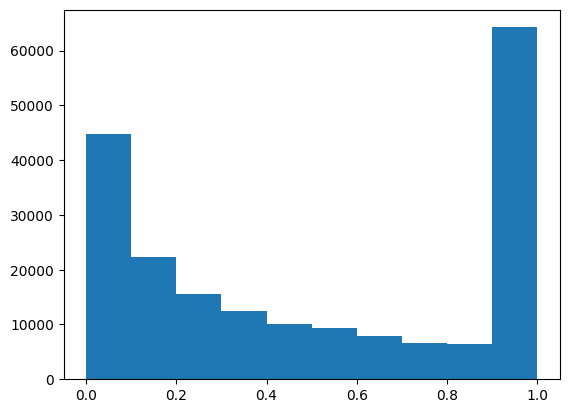

In [34]:
plt.hist(edge_index[:,2])

In [36]:
edge_index = torch.tensor([(int(row[0]), int(row[1])) for row in edge_index if row[2] > gamma], dtype=torch.long).t()


In [37]:
x = torch.tensor(df['amt'].values, dtype=torch.float).reshape(-1,1)
y = torch.tensor(df['is_fraud'].values,dtype=torch.int64)
data = torch_geometric.data.Data(x=x, edge_index = edge_index, y=y, train_mask = mask[0], test_mask= mask[1])


In [38]:
model = GCN1()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
yy = (data.y[data.test_mask]).numpy()
yyhat, yyhat_ = train_and_evaluate_model(data, model, optimizer)
yyhat_ = yyhat_.detach().numpy()
eval = evaluation(yy, yyhat, yyhat_)

In [39]:
eval

{'acc': 0.9077589077589078,
 'pre': 0.9048884165781084,
 'rec': 0.9455857856746253,
 'f1': 0.9247895737170785,
 'auc': 0.939867710765234}

---

In [47]:
edge_index2 = torch.tensor([(int(row[0]), int(row[1])) for row in edge_index if row[2] > 0.9], dtype=torch.long).t()


In [48]:
x = torch.tensor(df['amt'].values, dtype=torch.float).reshape(-1,1)
y = torch.tensor(df['is_fraud'].values,dtype=torch.int64)
data = torch_geometric.data.Data(x=x, edge_index = edge_index2, y=y, train_mask = mask[0], test_mask= mask[1])


In [49]:
model = GCN1()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
yy = (data.y[data.test_mask]).numpy()
yyhat, yyhat_ = train_and_evaluate_model(data, model, optimizer)
yyhat_ = yyhat_.detach().numpy()
eval = evaluation(yy, yyhat, yyhat_)

In [50]:
eval

{'acc': 0.7006327006327007,
 'pre': 0.7790841584158416,
 'rec': 0.6990560799555803,
 'f1': 0.7369037167105648,
 'auc': 0.794092716100595}